# Problem 1: time variations

In [4]:
import matplotlib.pyplot as plt
import re

def extract_single_task_times_from_file(file_path):
    times = []
    with open(file_path, 'r') as file:
        for line in file:
            # Use regular expression to find lines with times
            match = re.search(r'Single task: Run no\.  \d+: (\d+) occurrences found in (\d+[,\.]\d+) s', line)
            if match:
                time_str = match.group(2)  # Extract the time string
                # Replace ',' with '.' and convert to float
                time_float = float(time_str.replace(',', '.'))
                times.append(time_float)
    return times

def extract_multi_task_times_from_file(file_path):
    times = []
    with open(file_path, 'r') as file:
        for line in file:
            # Use regular expression to find lines with times
            match = re.search(r'Using  \d tasks: Run no\.  \d+: (\d+) occurrences found in (\d+[,\.]\d+) s', line)
            if match:
                time_str = match.group(2)  # Extract the time string
                # Replace ',' with '.' and convert to float
                time_float = float(time_str.replace(',', '.'))
                times.append(time_float)
    return times

def extract_average_speed_from_file(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            # Use regular expression to find lines with times
            match = re.search(r'Average speedup: (\d+[,\.]\d+)', line)
            if match:
                match_str = match.group(1)  # Extract the time string
                # Replace ',' with '.' and convert to float
                avg_speedup = float(match_str.replace(',', '.'))
                return avg_speedup

# Example usage:
# file_path = 'results/problem1-2-genome.txt'  # Replace with your file path
# time_array = extract_times_from_file(file_path)
# print(time_array)

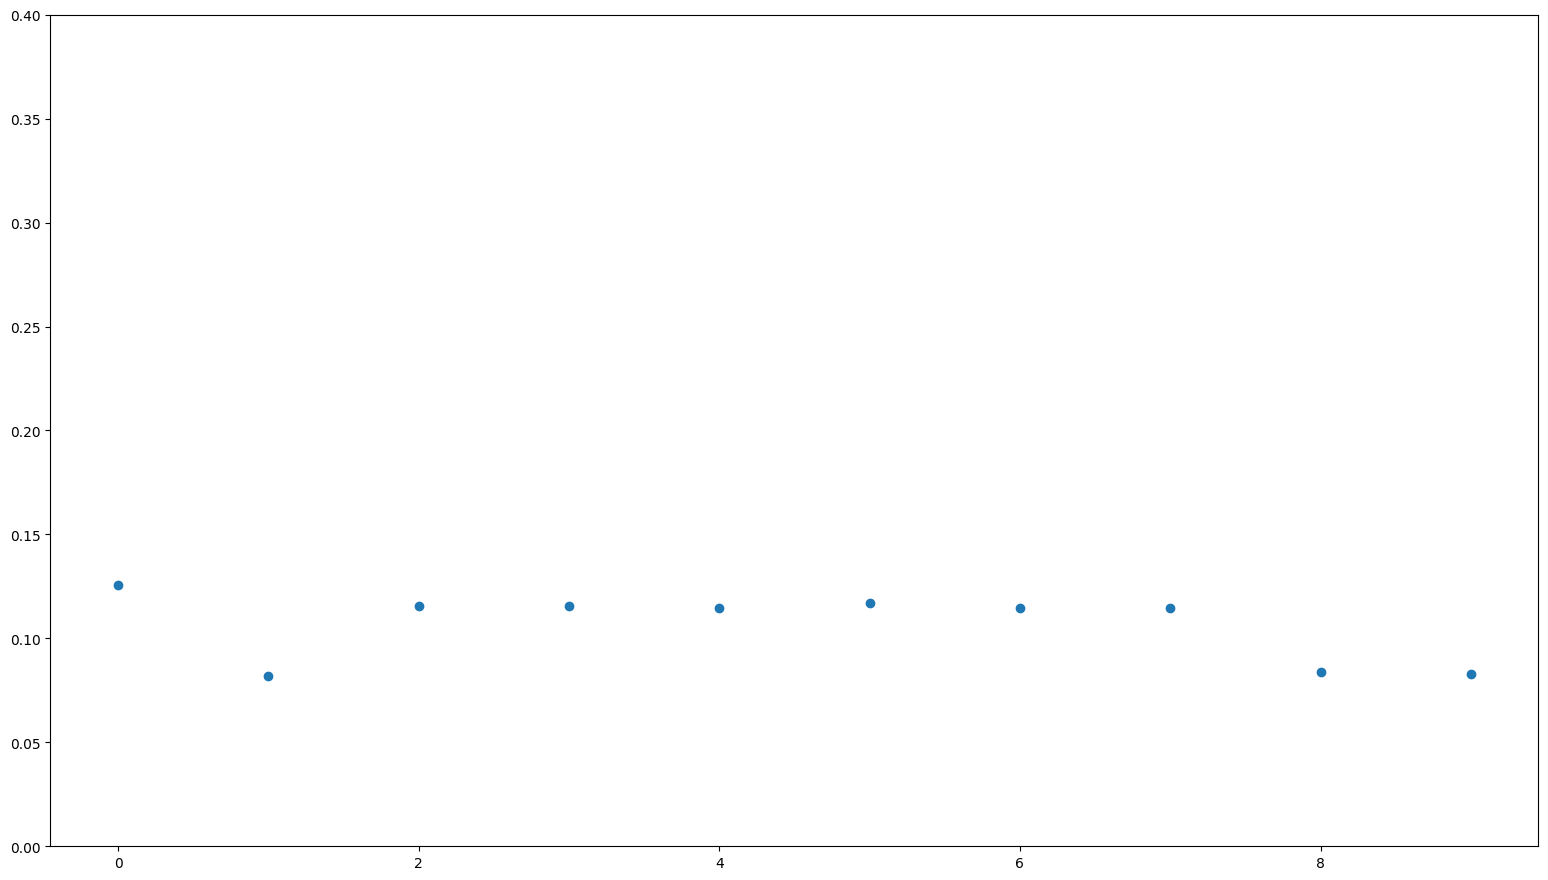

In [5]:

genome_y = extract_single_task_times_from_file('results/problem1/problem1-2-genome.txt')
x = range(len(genome_y))

# scatter plot of y vs x, in the resolution 16:9. y should start at 0.0
fig, ax = plt.subplots(figsize=(19.2, 10.8))
ax.set_ylim(0, 0.4)
ax.scatter(x, genome_y)

We see that the two first execution times are much more unstable. We will therefore use the warmup argument -W with a value of 2 from now on.

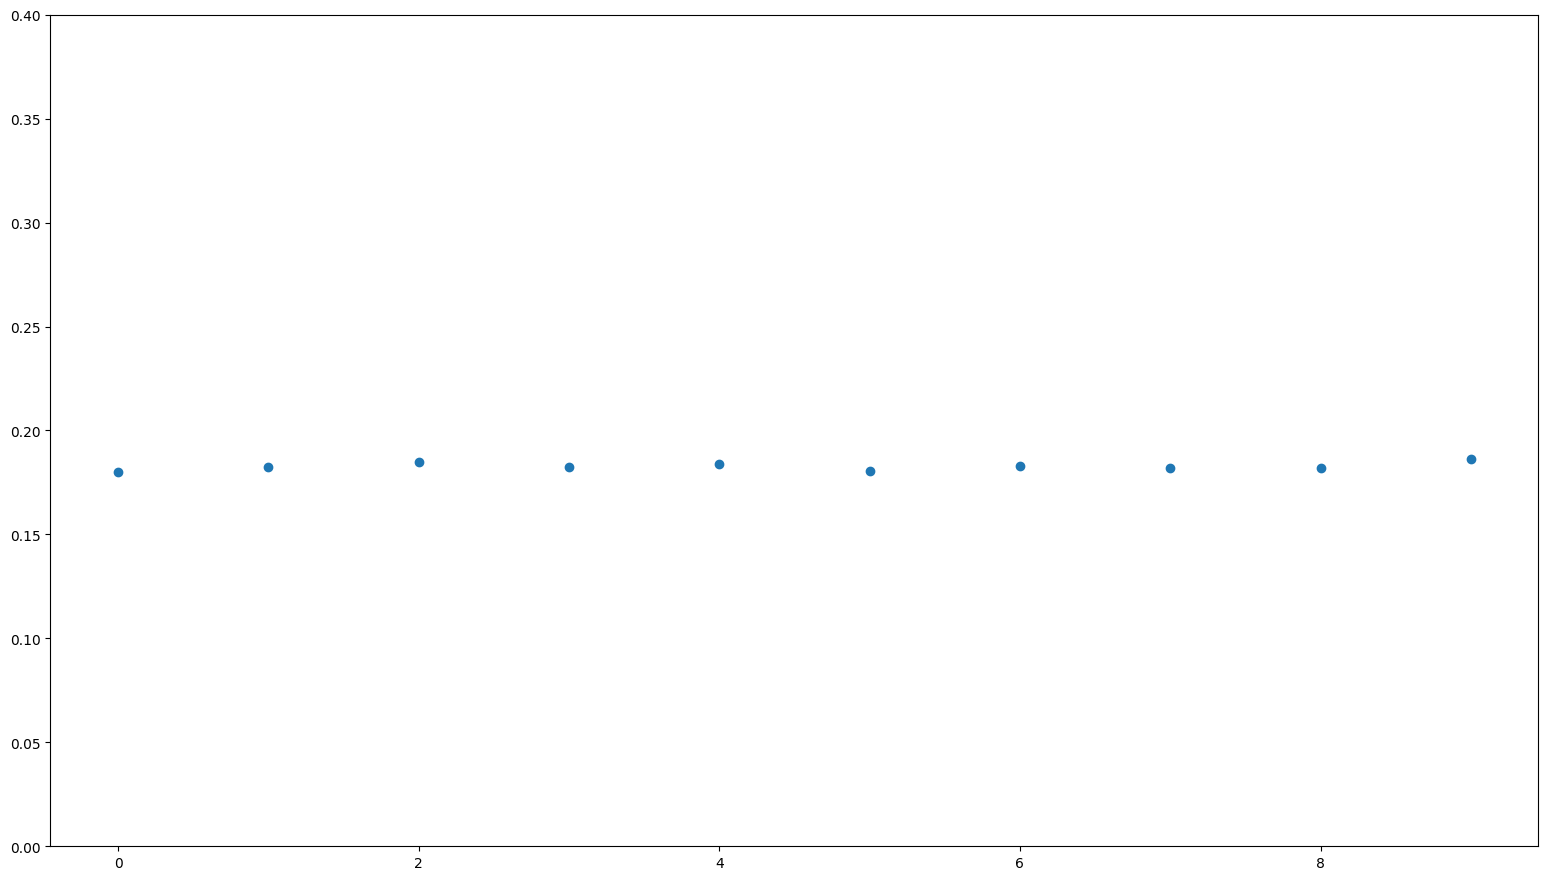

In [6]:
shakespeare_y = extract_single_task_times_from_file('results/problem1/problem1-2-shakespeare.txt')
x = range(len(shakespeare_y))

# scatter plot of y vs x, in the resolution 16:9. y should start at 0.0
fig, ax = plt.subplots(figsize=(19.2, 10.8))
ax.set_ylim(0, 0.4)
ax.scatter(x, shakespeare_y)

Now with a warmup of 2 we can get a much more stable line.

# Problem 2

After changing the code to allow for multiple tasks we can run the same tests again, with different amount of tasks and see which ones faster.

The speedup is not as expected, as even with many tasks it is running at an average speedup of only 1,15...?

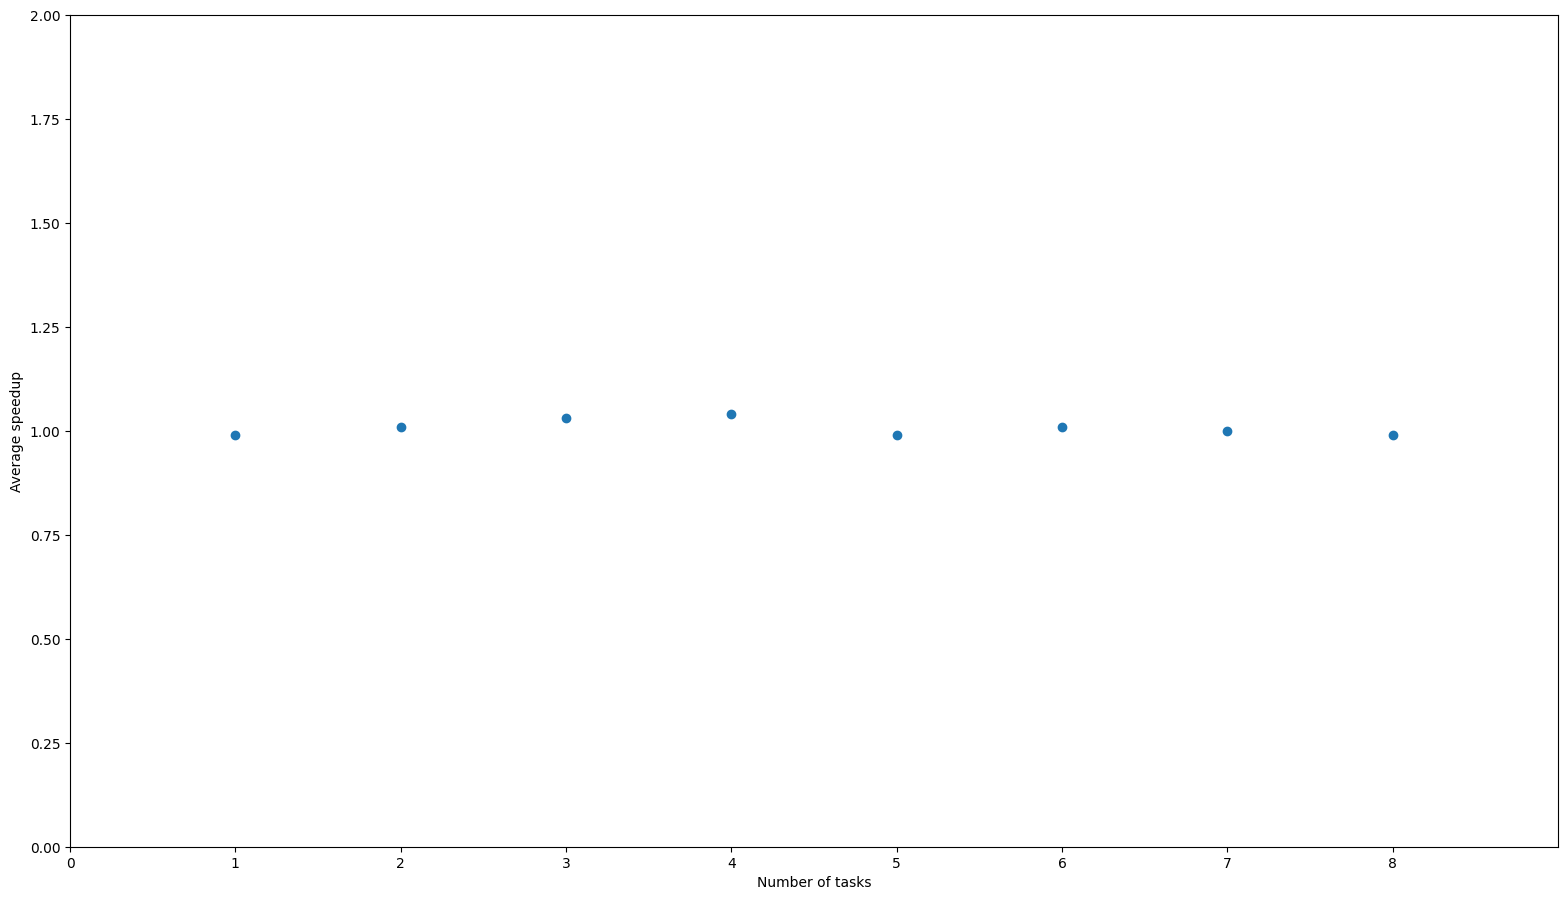

In [9]:
# plot average speedup vs number of tasks
shakespeare_y = []
plot_size = 9

for tasks in range(1, plot_size):
    shakespeare_y.append(
        extract_average_speed_from_file(f"results/problem2/shakespeare/tasks={tasks}.txt")
    )


x = range(1, plot_size)

# scatter plot of y vs x, in the resolution 16:9. y should start at 0.0
fig, ax = plt.subplots(figsize=(19.2, 10.8))
ax.set_ylim(0, 2)
ax.set_xlim(0, plot_size)
# set x ticks to be every 1
ax.set_xticks(range(plot_size))
ax.set_xlabel("Number of tasks")
ax.set_ylabel("Average speedup")
ax.scatter(x, shakespeare_y)

# Problem 3



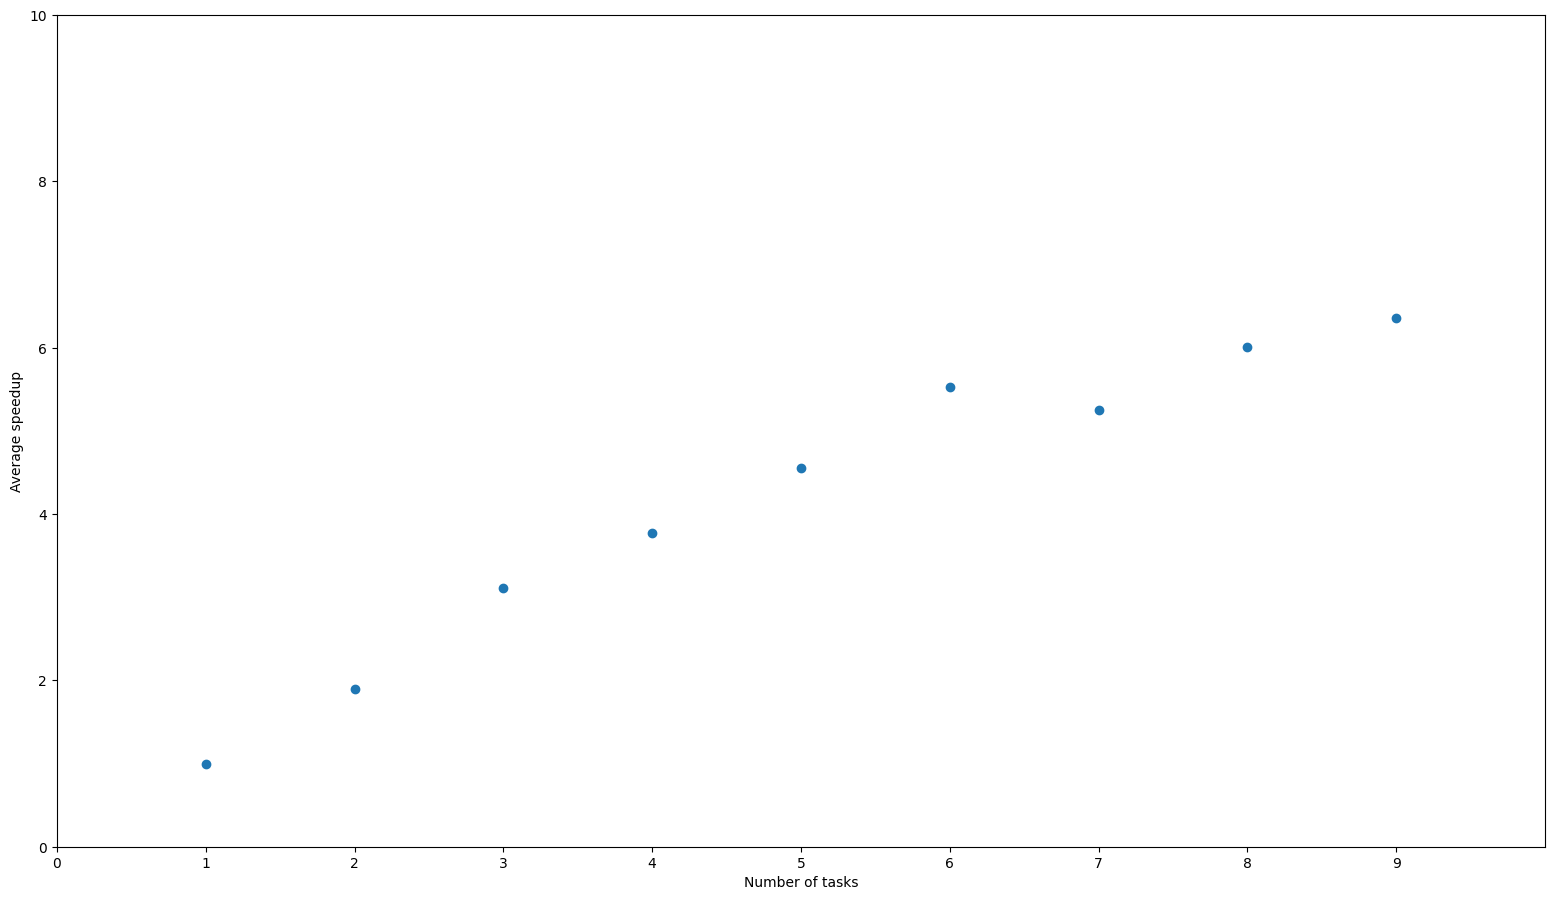

In [10]:
# plot average speedup vs number of tasks
shakespeare_y = []
plot_size = 10

for tasks in range(1, plot_size):
    shakespeare_y.append(
        extract_average_speed_from_file(f"results/problem3/shakespeare/tasks={tasks}.txt")
    )


x = range(1, plot_size)

# scatter plot of y vs x, in the resolution 16:9. y should start at 0.0
fig, ax = plt.subplots(figsize=(19.2, 10.8))
ax.set_ylim(0, 10)
ax.set_xlim(0, plot_size)
# set x ticks to be every 1
ax.set_xticks(range(plot_size))
ax.set_xlabel("Number of tasks")
ax.set_ylabel("Average speedup")
ax.scatter(x, shakespeare_y)

Because we are not yet at the limit we will try and increase the amount of tasks that are running, to see when it goes down again. Here we increased the range from (2,10) to (2,160) in Problem3_TestTasks.py.

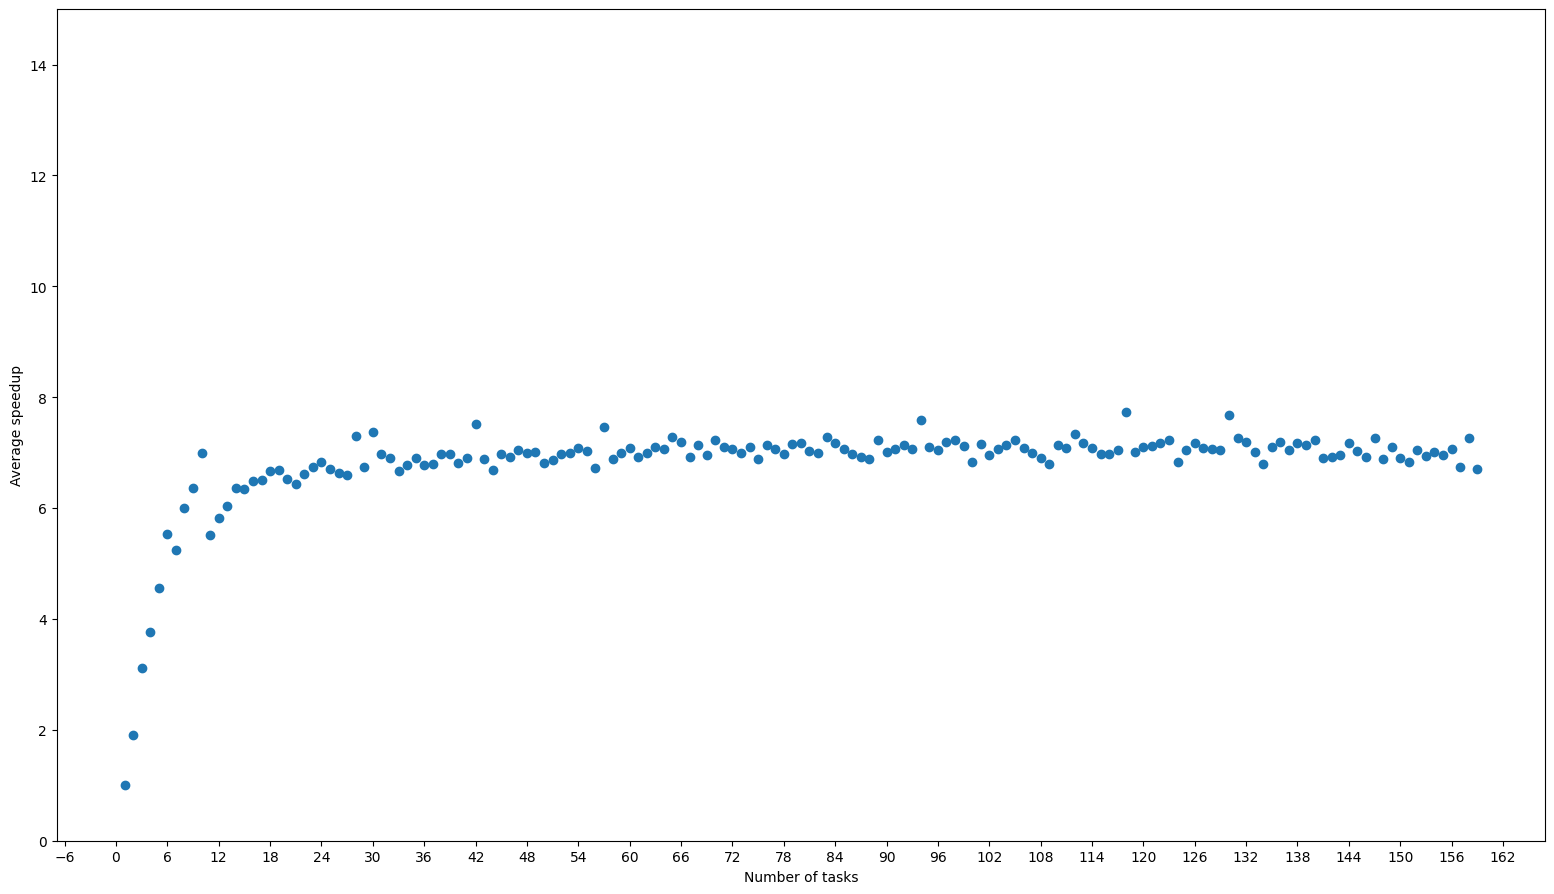

In [11]:
# plot average speedup vs number of tasks

genome_y = []
large_file_y = []
xtest_y = []
shakespeare_y = []

tests = 160

for tasks in range(1, tests):
    # genome_y.append(
    #     extract_average_speed_from_file(f"results/problem2/human_genome/tasks={i}.txt")
    # )
    # large_file_y.append(
    #     extract_average_speed_from_file(f"results/problem2/large_file/tasks={i}.txt")
    # )
    # xtest_y.append(
    #     extract_average_speed_from_file(f"results/problem2/xtest/tasks={i}.txt")
    # )
    shakespeare_y.append(
        extract_average_speed_from_file(f"results/problem3/shakespeare/tasks={tasks}.txt")
    )


x = range(1, tests)

# scatter plot of y vs x, in the resolution 16:9. y should start at 0.0
fig, ax = plt.subplots(figsize=(19.2, 10.8))
ax.set_ylim(0, 15)
# ax.scatter(x, genome_y)
# ax.scatter(x, large_file_y)
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.set_xlabel("Number of tasks")
ax.set_ylabel("Average speedup")
ax.scatter(x, shakespeare_y)
# ax.scatter(x, xtest_y)

Even with a whopping 160 tasks, there seems to be no drop-off in performance from around 16-20 tasks. Even trying 200, 400, 600, 800 tasks there is no significant drop-off. At 4000 tasks average speedup of one run was a little bit above 5, so a slight decrease to the same as around 7-8 tasks. At 16000 tasks we are getting a mere 2,5 times speedup, which is the same as 2-3 tasks. 

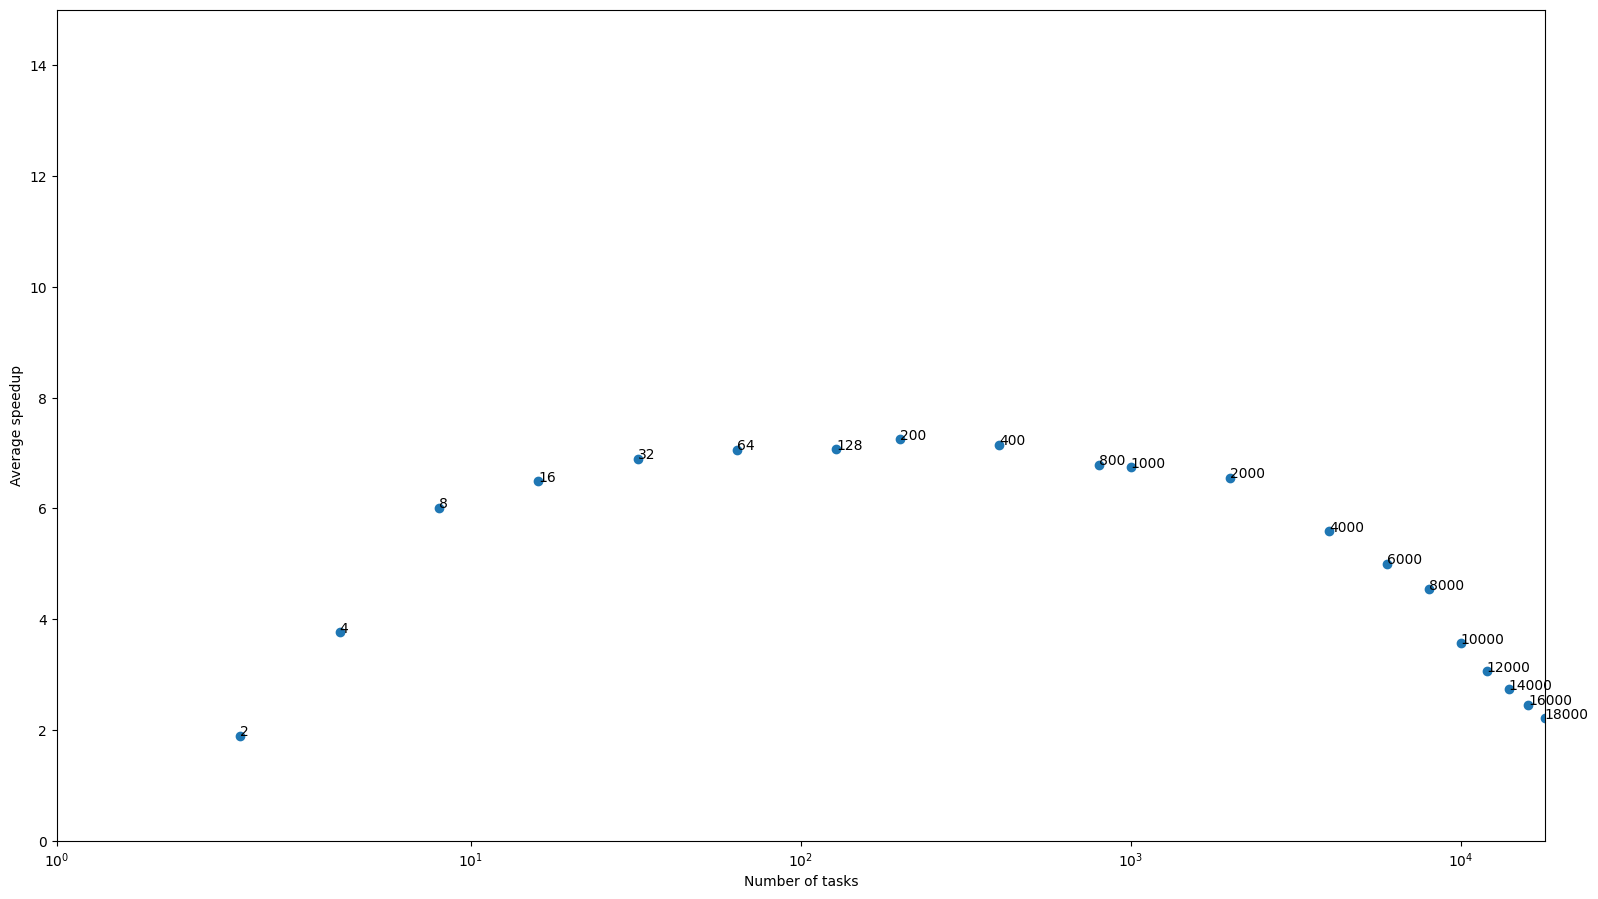

In [18]:
tasks = [2, 4, 8, 16, 32, 64, 128, 200, 400, 800, 1000, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 22000, 24000]

y = []
for task in tasks:
    y.append(
        extract_average_speed_from_file(f"results/problem3/shakespeare/tasks={task}.txt")
    )

# scatter plot of y vs x, in the resolution 16:9. y should start at 0.0
fig, ax = plt.subplots(figsize=(19.2, 10.8))
ax.set_ylim(0, 15)
ax.set_xlim(1, 18000)
ax.set_xscale('symlog')
ax.set_xlabel("Number of tasks")
ax.set_ylabel("Average speedup")
# annotate the points with their respective tasks
for task, txt in enumerate(tasks):
    ax.annotate(txt, (tasks[task], y[task]))

ax.scatter(tasks, y)

# Problem 4


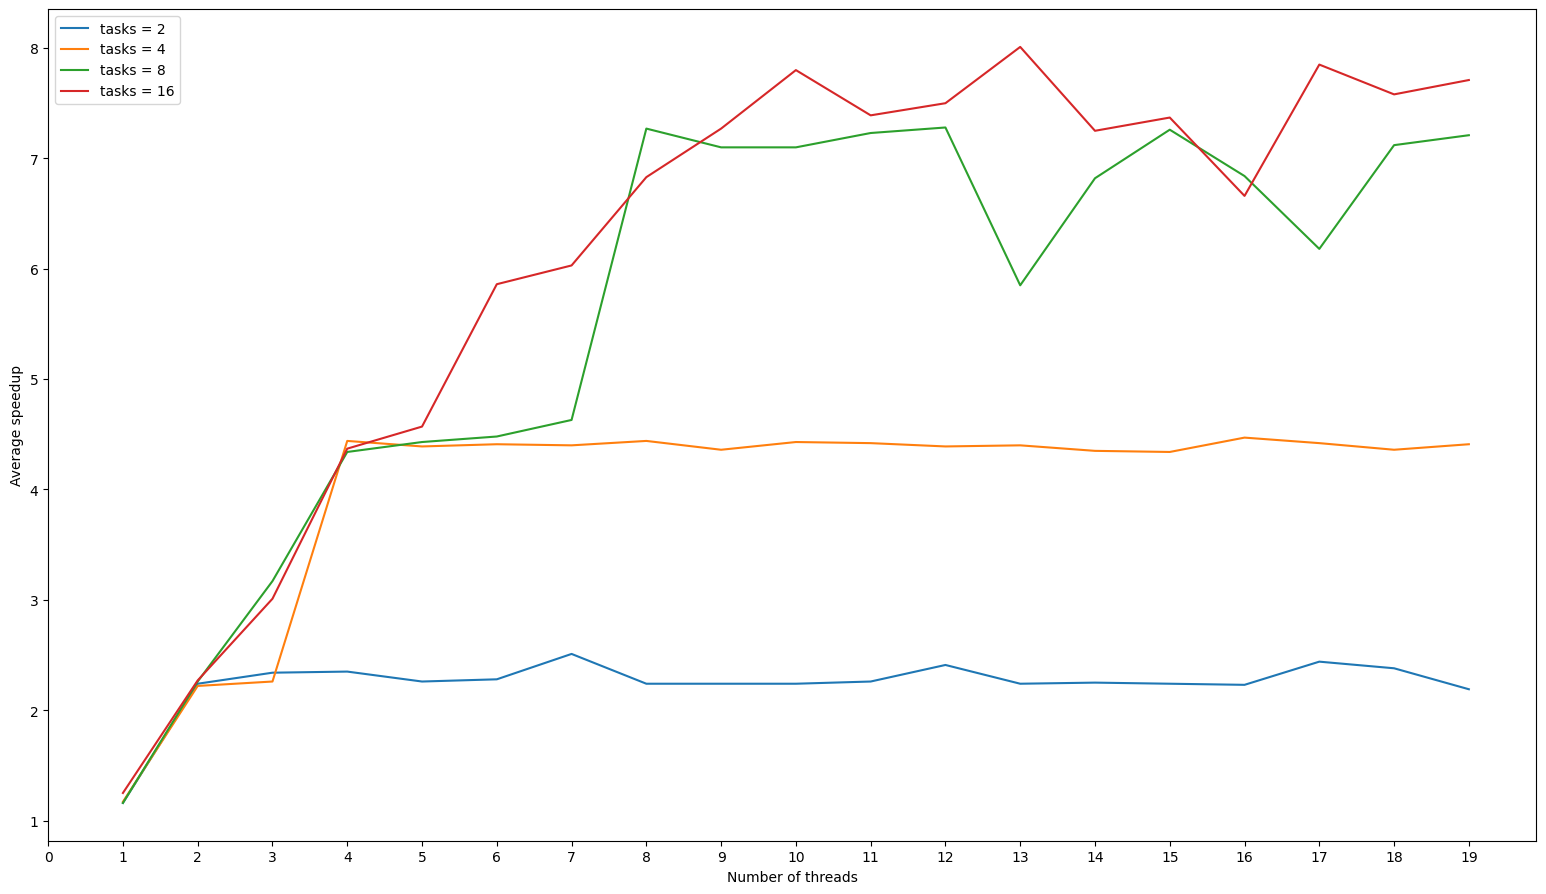

In [14]:
# plot average speedup vs number of threads for each amount of tasks

plots = [2, 4, 8, 16]
plot_size = 20
# make a 2d array of size plot_size x plot_size
y = [[] for _ in range(plot_size)]

for tasks in plots:
    for threads in range(1, plot_size):
        y[tasks].append(
            extract_average_speed_from_file(
                f"results/problem4/shakespeare/ta={tasks},tr={threads}.txt"
            )
        )

x = range(1, plot_size)

fig, ax = plt.subplots(figsize=(19.2, 10.8))
for tasks in plots:
    ax.plot(x, y[tasks], label=f"tasks = {tasks}")
ax.set_xticks(range(plot_size))
ax.set_xlabel("Number of threads")
ax.set_ylabel("Average speedup")
ax.legend()

# Problem 5

We run the same graphs from problem 3 on the data we generated in the HPC.

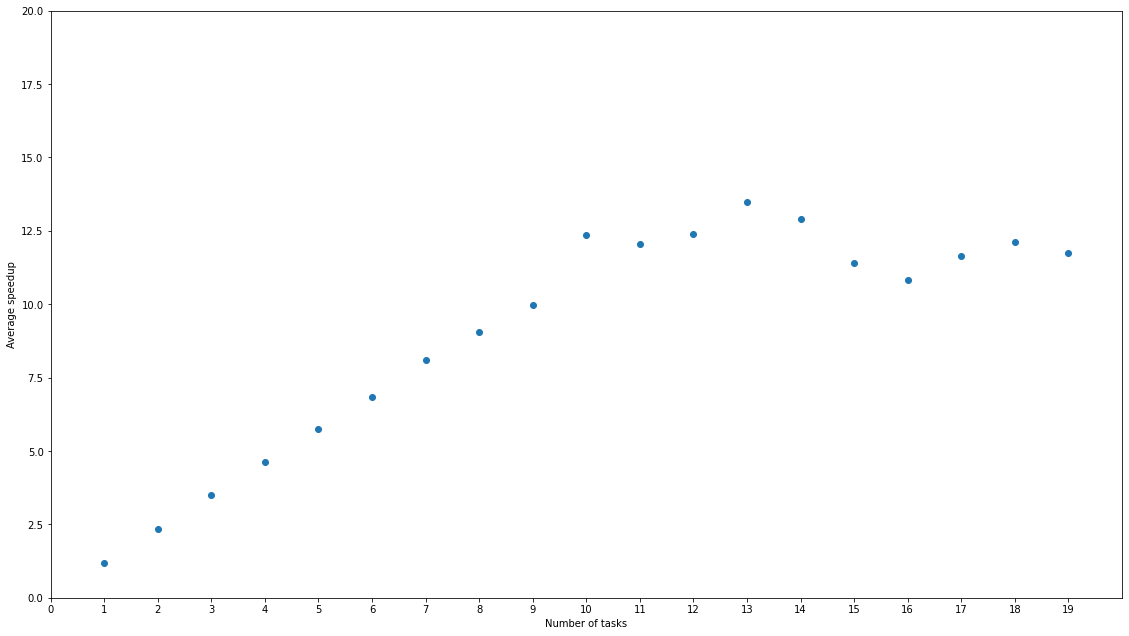

In [30]:
# plot average speedup vs number of tasks
shakespeare_y = []
plot_size = 20

for tasks in range(1, plot_size):
    shakespeare_y.append(
        extract_average_speed_from_file(f"results/problem3.hpc/shakespeare/tasks={tasks}.txt")
    )


x = range(1, plot_size)

# scatter plot of y vs x, in the resolution 16:9. y should start at 0.0
fig, ax = plt.subplots(figsize=(19.2, 10.8))
ax.set_ylim(0, 20)
ax.set_xlim(0, plot_size)
# set x ticks to be every 1
ax.set_xticks(range(plot_size))
ax.set_xlabel("Number of tasks")
ax.set_ylabel("Average speedup")
ax.scatter(x, shakespeare_y)

Because it still seems it could be going up we do it for the first 160 number of tasks.

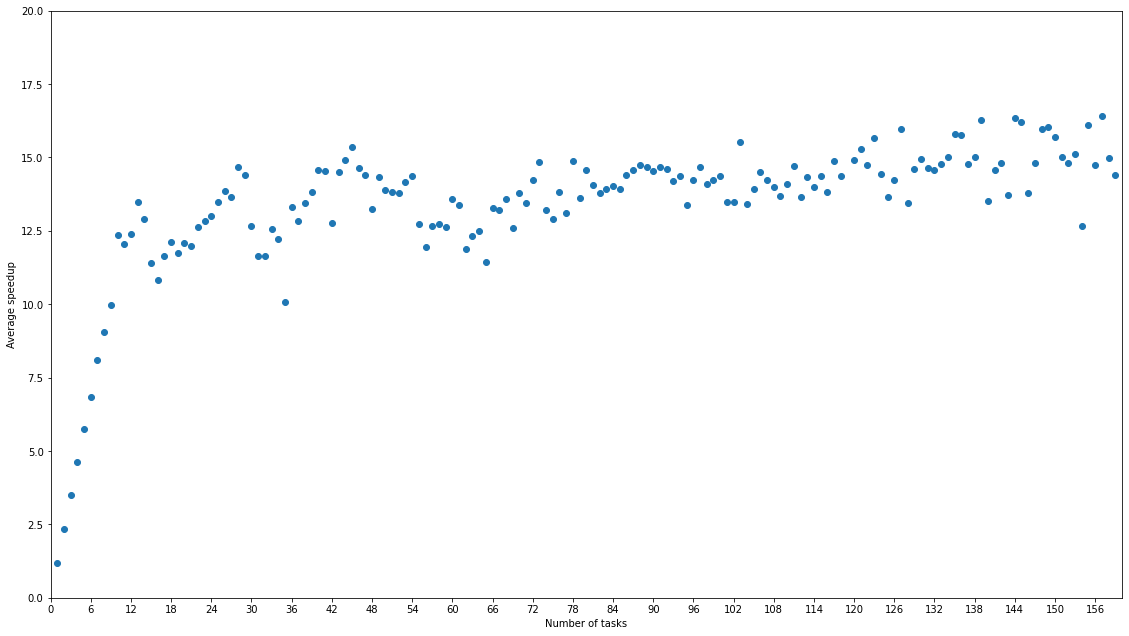

In [32]:
# plot average speedup vs number of tasks
shakespeare_y = []
plot_size = 160

for tasks in range(1, plot_size):
    shakespeare_y.append(
        extract_average_speed_from_file(f"results/problem3.hpc/shakespeare/tasks={tasks}.txt")
    )


x = range(1, plot_size)

# scatter plot of y vs x, in the resolution 16:9. y should start at 0.0
fig, ax = plt.subplots(figsize=(19.2, 10.8))
ax.set_ylim(0, 20)
ax.set_xlim(0, plot_size)
# set x ticks to be every 1
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.set_xlabel("Number of tasks")
ax.set_ylabel("Average speedup")
ax.scatter(x, shakespeare_y)